<a href="https://colab.research.google.com/github/Dharklite/data-science-projects/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Unemployment Analysis with Python
This notebook analyzes unemployment data in India using the dataset `Unemployment_Rate_upto_11_2020.csv`.
We will explore the unemployment rate over time, across different regions, and observe the impact of COVID-19.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
# Dataset summary
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [8]:
# Rename columns for convenience
df.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate',
              'Estimated Employed', 'Estimated Labour Participation Rate',
              'Area Name', 'Longitude', 'Latitude']

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-8-7b200d0f9a53>:7: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


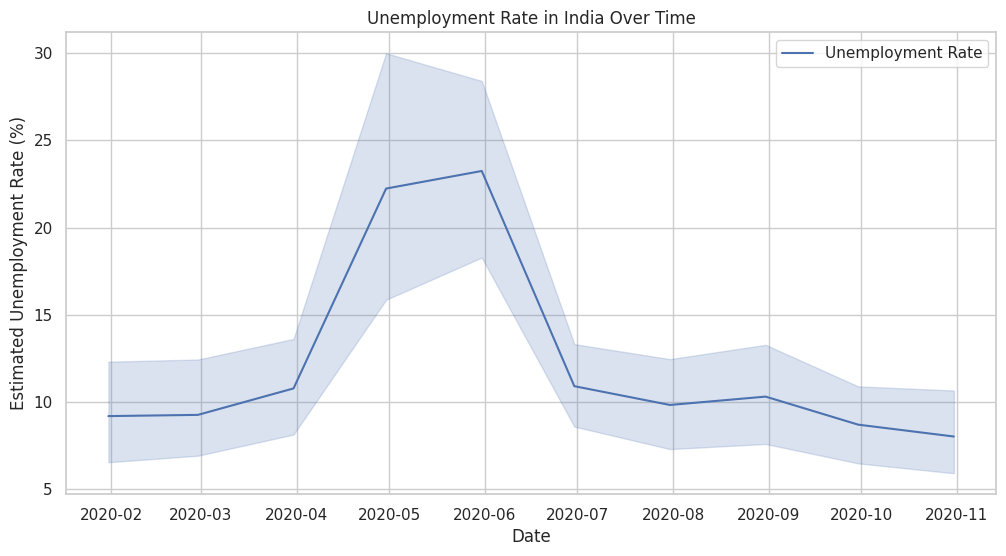

In [9]:
# Unemployment rate over time (nationwide)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate', label='Unemployment Rate')
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

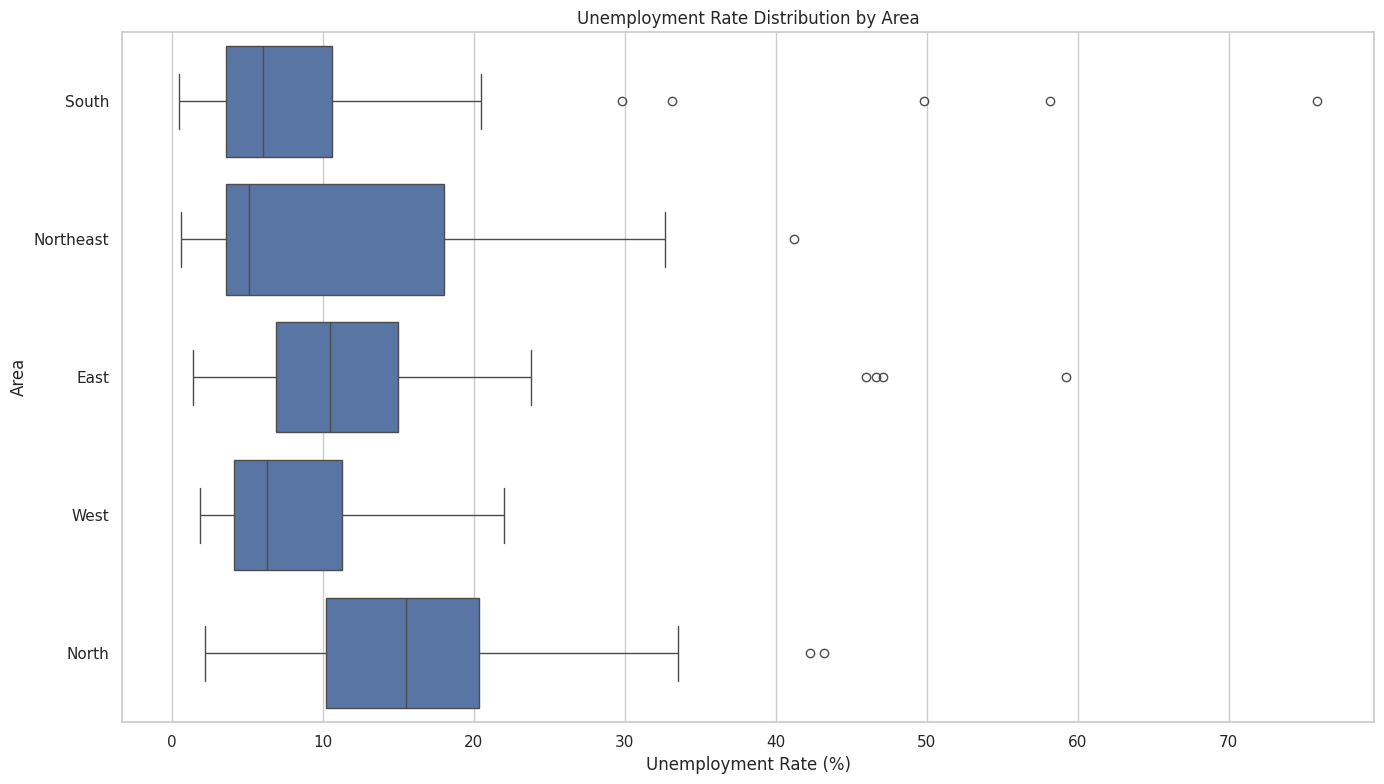

In [10]:
# Unemployment by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Estimated Unemployment Rate', y='Area Name')
plt.title('Unemployment Rate Distribution by Area')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

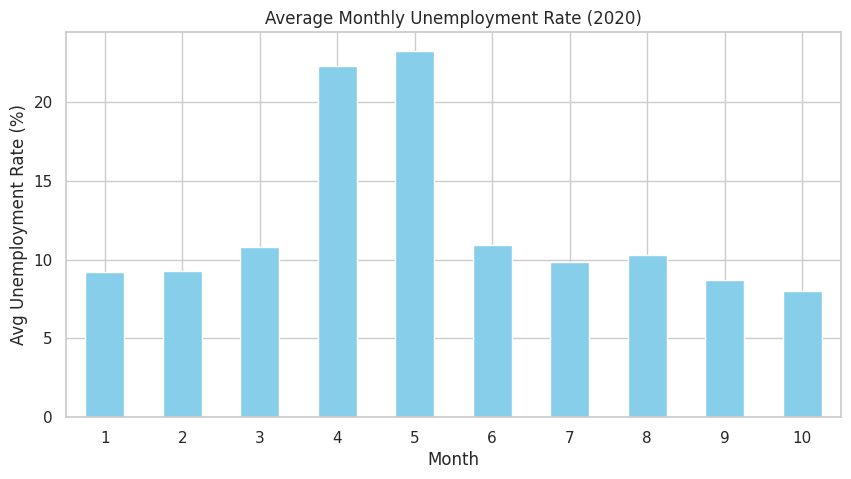

In [11]:
# Monthly trend
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Unemployment Rate (2020)')
plt.xlabel('Month')
plt.ylabel('Avg Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()